# Проект: Cборный проект 1

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования**:
1. Проанализировать игры по платформам и жанрам.
2. Составить портрет аудитории.
3. Проверить гипотезы.

**Ход исследования**:
1. Обзор данных.
2. Предобработка данных.
3. Исследование данных.
4. Создание портрета пользователей.
5. Проверка гипотез.
6. Написание общего вывода.

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import scipy.stats as stats
from scipy.stats import binom, norm
from scipy.stats import zscore
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Шаг 2. Подготовьте данные

In [3]:
data = data.rename(columns={'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release' : 'year_of_release', 'Genre' : 'genre', 'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score', 'User_Score' : 'user_score', 'Rating' : 'rating'})
print(data.columns) # привела к нижнему геристру

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [4]:
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x) # на всякий случай все приведу в нижний регистр

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.duplicated().sum()

0

In [8]:
temp = data.copy()
temp[temp[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012.0,sports,2.11,0.22,0.00,0.23,83.0,5.5,e
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,madden nfl 13,ps3,2012.0,sports,0.00,0.01,0.00,0.00,83.0,5.5,e


In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data.drop([659, 14244], inplace=True)
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Видимо данные 1993 года утеряны, удалим их

In [12]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

С названиями все ок

In [13]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [14]:
data['platform'].value_counts()

ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
nes       98
gb        98
dc        52
gen       27
ng        12
ws         6
scd        6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

По платформам все ок

In [15]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [16]:
data['year_of_release'].shape

(16713,)

In [17]:
data = data.dropna(subset=['year_of_release'])
data.reset_index(drop=True, inplace=True)
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [18]:
data['year_of_release'].shape

(16444,)

Удалила пропуски в годах: это 1.61% значений

In [19]:
data['year_of_release'] = data['year_of_release'].astype('int')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Пропуски по годам ничем не заменить, оставлю нулями

In [20]:
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

С жанром все в порядке

In [21]:
min_sales = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].min()
print("Минимальные значения продаж:")
print(min_sales)

max_sales = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].max()
print("\nМаксимальные значения продаж:")
print(max_sales)

Минимальные значения продаж:
na_sales         0.0
eu_sales         0.0
jp_sales         0.0
other_sales      0.0
critic_score    13.0
dtype: float64

Максимальные значения продаж:
na_sales        41.36
eu_sales        28.96
jp_sales        10.22
other_sales     10.57
critic_score    98.00
dtype: float64


C продажами все в порядке

In [22]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') #Принудительно заменила на NaN
data['user_score'] = data['user_score'].fillna(-1)

In [23]:
data['rating'] = data['rating'].fillna('unknown')
data['rating'].unique()

array(['e', 'unknown', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

In [24]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Заменила типы данных. Теперь везде все ок

In [26]:
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [27]:
data['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Пропусков нет

Данные по году могут отсутствовать, потому что их ее не указали на платформе. Не на всех играх есть оценки пользователей и критиков, а также проставлен рейтинг, поэтому там тоже часть данных пропущена. Эти пропуски мы заменить не можем.

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] # создала столбец с суммарной выручкой
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


In [29]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [31]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,32.979871,2.688081,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,36.302947,4.170124,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


**Работы по разделу предобработка данных:**

1. Переименовны столбцы.
2. Проверены явные и неявные дубликаты, аномалии в значениях.
3. Удалены данные совокупно около 2%.
4. Поставлены заглушки на рейтинг и оценки.
5. Добавлен столбец с общим количеством продаж.

**Выводы по разделу предобработка данных:**
1. Поле года выпуска игры не везде заполнено. Эти данные составляли небольшой процент от всех данных, поэтому принято решение их удалить. 
2. Рейтинг и оценки стоят не во всех играх, но объем таких игр значителен, поэтому поставлены заглушки.

### Шаг 3. Проведите исследовательский анализ данных

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

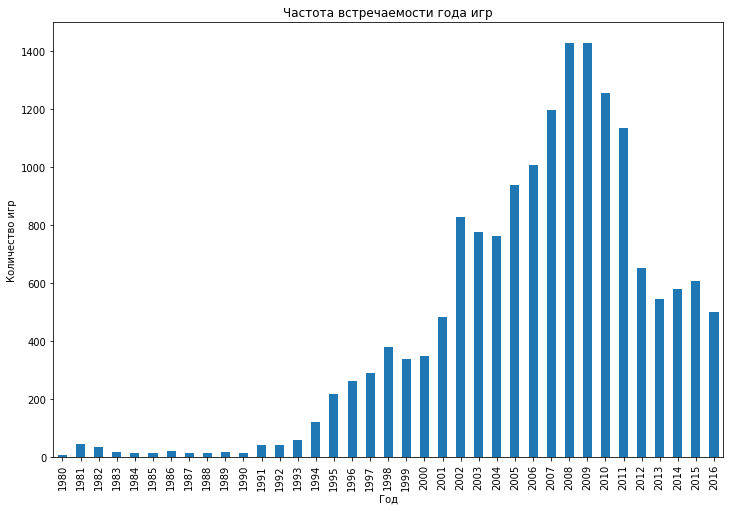

In [32]:
plt.figure(figsize=(12, 8)) 
data['year_of_release'].value_counts().sort_index().plot.bar()
plt.title('Частота встречаемости года игр')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

In [33]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Наблюдается ожидаемый рост количества игр от 90х к двухтысячным. Есть наиболее успешные на игры годы 2007-2011гг. Все данные важны, не буду ничего удалять

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

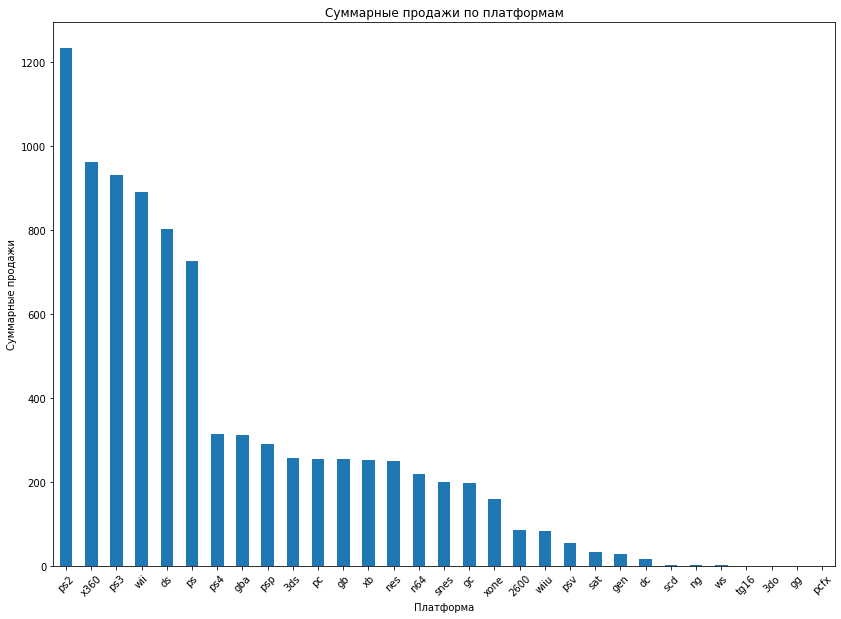

In [34]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(14, 10))
plt.title('Суммарные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.show()

Больше всего продаж за весь период у ps2

In [35]:
top_platform = data.query('(platform=="ps2" or platform=="x360" or platform=="ps3" or platform=="wii" \
or platform=="ds" or platform=="ps") and (year_of_release!=0)')

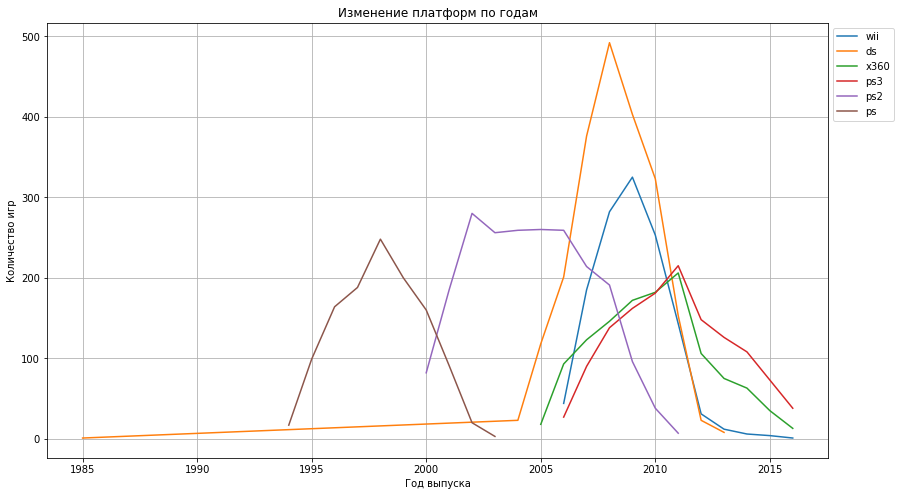

In [36]:
plt.figure(figsize=(14, 8))
platforms = top_platform['platform'].unique()
for platform in platforms:
    platform_data = top_platform[top_platform['platform'] == platform].groupby('year_of_release').size()
    plt.plot(platform_data.index, platform_data.values, label=platform)

plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Изменение платформ по годам')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(np.arange(min(top_platform['year_of_release']), max(top_platform['year_of_release'])+1, 5)) #выставила шаг 5 лет
plt.show()

In [37]:
top_platform.query('year_of_release < 2004 and platform == "ds"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,-1.0,-1.0,unknown,0.02


In [38]:
top_platform = top_platform[top_platform.index != 15704]
top_platform.query('year_of_release < 2004 and platform == "ds"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Нашлась одна аномалия. Удалим это значение и повторим график

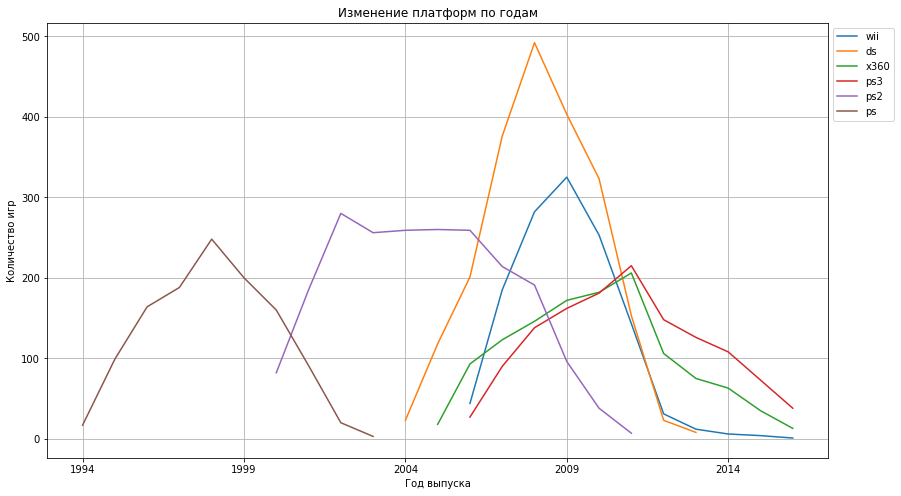

In [39]:
plt.figure(figsize=(14, 8))
platforms = top_platform['platform'].unique()
for platform in platforms:
    platform_data = top_platform[top_platform['platform'] == platform].groupby('year_of_release').size()
    plt.plot(platform_data.index, platform_data.values, label=platform)

plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Изменение платформ по годам')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(np.arange(min(top_platform['year_of_release']), max(top_platform['year_of_release'])+1, 5)) #выставила шаг 5 лет
plt.show()

In [40]:
# Комментарий ревьюера
temp = data[data.year_of_release != 0].copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Платформы ds, ps, ps2 не дожили до 2016 года. В среднем платформа живет 7 лет. 
Пик количества игр пришелся на промежуток 2005-2010гг на платформе ds. 

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Для прогнозных значений посмотрим все платформы за последние 4 года

In [41]:
platform_4_years = data.query('year_of_release >= 2013')
platform_4_years.count()

name               2233
platform           2233
year_of_release    2233
genre              2233
na_sales           2233
eu_sales           2233
jp_sales           2233
other_sales        2233
critic_score       2233
user_score         2233
rating             2233
total_sales        2233
dtype: int64

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [42]:
platform_4_years.groupby('platform')['total_sales'].sum().sort_values()

platform
ds        1.54
psp       3.50
wii      13.66
psv      32.99
pc       39.43
wiiu     64.63
x360    136.80
3ds     143.25
xone    159.32
ps3     181.43
ps4     314.14
Name: total_sales, dtype: float64

По продажам за три года лидируют платформы ps4. С отрывом ps3, xone, 3ds, x360

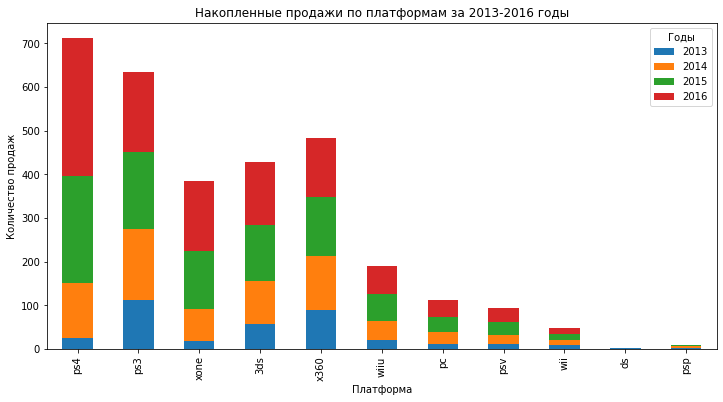

In [43]:
# Группировка данных по платформам и годам
platform_sales = platform_4_years.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Накопленное количество продаж по годам
platform_cumsum = platform_sales.cumsum(axis=1)

# Сортировка данных по суммам продаж за последний год (2016 год) в порядке убывания
platform_sorted = platform_cumsum.sort_values(by=2016, ascending=False)

# Построение накопленной диаграммы с отсортированными данными
platform_sorted.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('Накопленные продажи по платформам за 2013-2016 годы')
plt.legend(title='Годы')
plt.show()

К 2016 году набирает популярность платформа ps4, xone. Платформы ps3, 3ds, x360 удерживают позиции прошлого года.

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат**

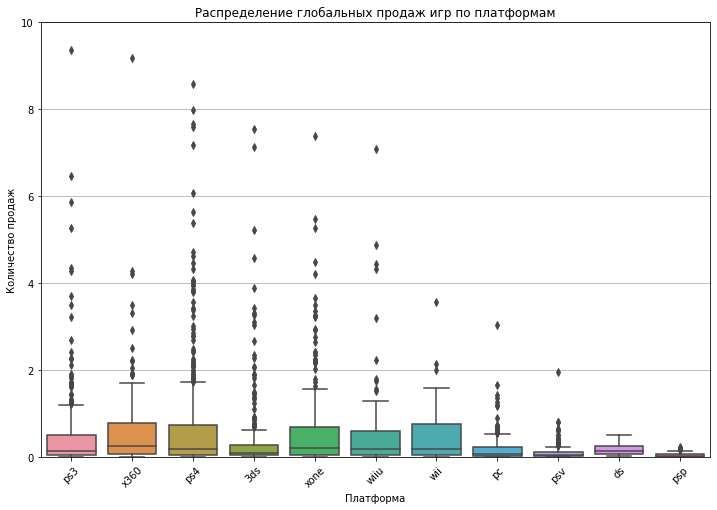

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=platform_4_years)
plt.ylim(0, 10) #приблизить график
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('Распределение глобальных продаж игр по платформам')
plt.xticks(rotation=45)  # повернуть подписи оси X для удобства
plt.grid(axis='y')  # отображать сетку только по оси Y
plt.show()

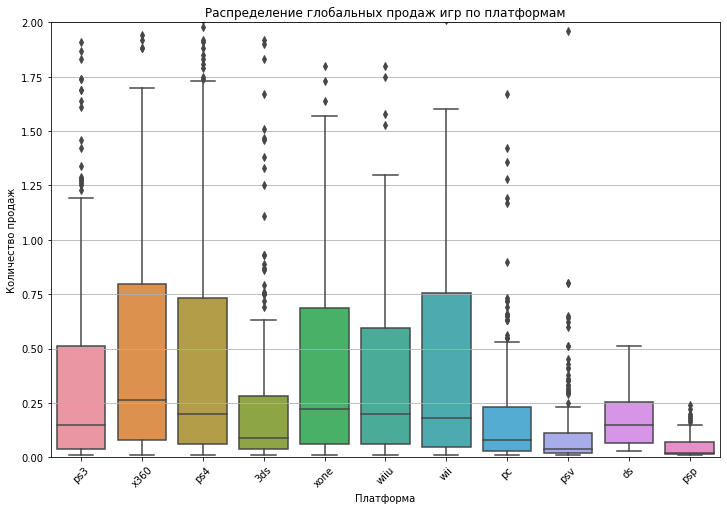

In [45]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=platform_4_years)
plt.ylim(0, 2) #приблизить график
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('Распределение глобальных продаж игр по платформам')
plt.xticks(rotation=45)  # повернуть подписи оси X для удобства
plt.grid(axis='y')  # отображать сетку только по оси Y
plt.show()

PS4 обогнала PS3 в 2016 году и стала лидером по количеству продаж. 

Xone обогнала PS3 по общему количество продаж, а также на графике видно, что игры на xone в среднем продаются лучше. 

Платформа 3ds занимает 4 место по количеству проданных копий, однако на графике много выбросов, а тело короткое - вероятно на платформе много игр, но они продаются маленьким объемом копий. 

Берем в топ-5 для детального рассмотрения: x360, xone, ps4, wiiu, wii

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

Рассмотрим лидера продаж PS4.

In [46]:
platform_ps4 = platform_4_years[platform_4_years['platform'] == "ps4"]

critic_filtered_platform_ps4 = platform_ps4.query('critic_score != -1 and total_sales != 0')
print(len(critic_filtered_platform_ps4.count()))

user_filtered_platform_ps4 = platform_ps4.query('user_score != -1 and total_sales != 0')
print(len(user_filtered_platform_ps4.count()))

12
12


In [47]:
print(len(platform_4_years.query('critic_score != -1')))
print(len(platform_4_years.query('user_score != -1')))
print(len(platform_4_years.query('critic_score != -1 and user_score != -1')))
print(len(platform_4_years.query('critic_score != -1 and user_score != -1 and rating != "unknown"')))
print(len(platform_4_years.query('critic_score != -1 and user_score != -1 and rating != "unknown" and total_sales != 0')))

991
1192
976
942
942


Оставим для этого этапа почищенные данные без заглушек

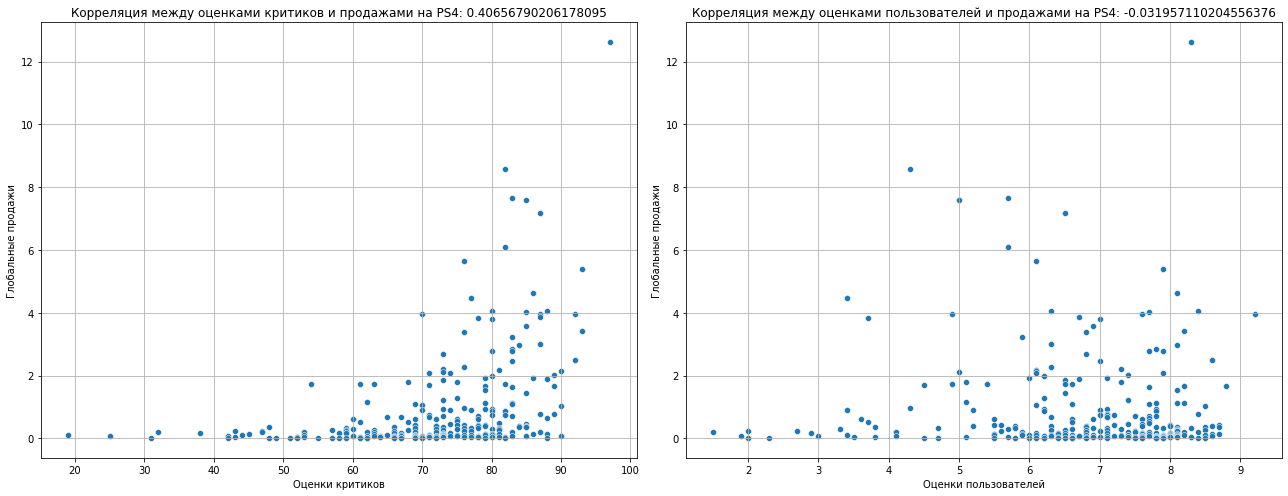

In [48]:
plt.figure(figsize=(18, 7))

correlation_critic_ps4 = critic_filtered_platform_ps4['critic_score'].corr(critic_filtered_platform_ps4['total_sales'])
correlation_user_ps4 = user_filtered_platform_ps4['user_score'].corr(user_filtered_platform_ps4['total_sales'])

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_ps4.query('critic_score != -1'), palette='Set1')
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи')
plt.title(f"Корреляция между оценками критиков и продажами на PS4: {correlation_critic_ps4}")
plt.grid()

plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_ps4.query('user_score != -1'), palette='Set2')
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи')
plt.title(f"Корреляция между оценками пользователей и продажами на PS4: {correlation_user_ps4}")
plt.grid()

plt.tight_layout()
plt.show()

На платформе PS4 наблюдается слабая корреляция оценки критиков и очень слабая корреляция оценки пользователей

**Соотнесите выводы с продажами игр на других платформах.**

wiiu

In [49]:
platform_wiiu = platform_4_years[platform_4_years['platform'] == "wiiu"]

critic_filtered_platform_wiiu = platform_wiiu.query('critic_score != -1 and total_sales != 0')
print(len(critic_filtered_platform_wiiu.count()))

user_filtered_platform_wiiu = platform_wiiu.query('user_score != -1 and total_sales != 0')
print(len(user_filtered_platform_wiiu.count()))

12
12


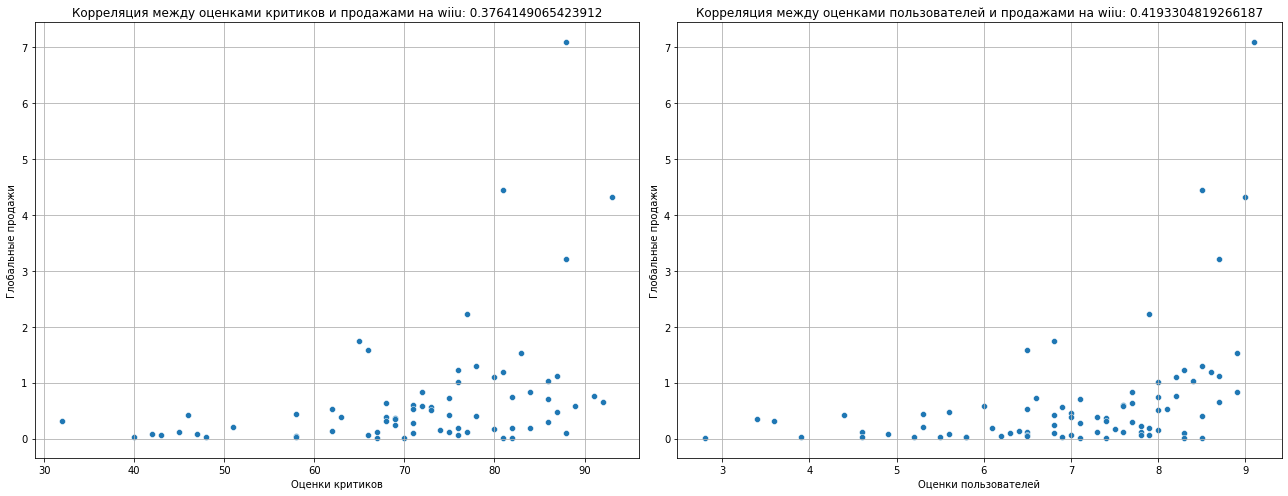

In [50]:
plt.figure(figsize=(18, 7))

correlation_critic_wiiu = critic_filtered_platform_wiiu['critic_score'].corr(critic_filtered_platform_wiiu['total_sales'])
correlation_user_wiiu = user_filtered_platform_wiiu['user_score'].corr(user_filtered_platform_wiiu['total_sales'])

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_wiiu.query('critic_score != -1'), palette='Set1')
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи')
plt.title(f"Корреляция между оценками критиков и продажами на wiiu: {correlation_critic_wiiu}")
plt.grid()

plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_wiiu.query('user_score != -1'), palette='Set2')
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи')
plt.title(f"Корреляция между оценками пользователей и продажами на wiiu: {correlation_user_wiiu}")
plt.grid()

plt.tight_layout()
plt.show()

На платформе wiiu наблюдается слабая корреляция между оценками критиков и пользователей

Xone

In [51]:
platform_xone = platform_4_years[platform_4_years['platform'] == "xone"]

critic_filtered_platform_xone = platform_xone.query('critic_score != -1 and total_sales != 0')
print(len(critic_filtered_platform_xone.count()))

user_filtered_platform_xone = platform_xone.query('user_score != -1 and total_sales != 0')
print(len(user_filtered_platform_xone.count()))

12
12


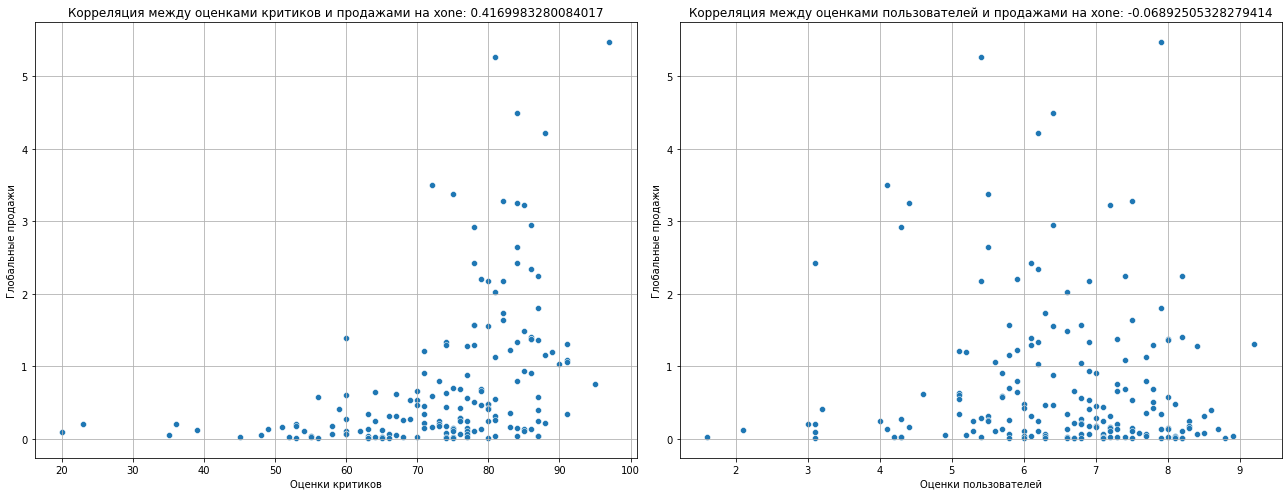

In [52]:
plt.figure(figsize=(18, 7))

correlation_critic_xone = critic_filtered_platform_xone['critic_score'].corr(critic_filtered_platform_xone['total_sales'])
correlation_user_xone = user_filtered_platform_xone['user_score'].corr(user_filtered_platform_xone['total_sales'])

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_xone.query('critic_score != -1'), palette='Set1')
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи')
plt.title(f"Корреляция между оценками критиков и продажами на xone: {correlation_critic_xone}")
plt.grid()

plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_xone.query('user_score != -1'), palette='Set2')
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи')
plt.title(f"Корреляция между оценками пользователей и продажами на xone: {correlation_user_xone}")
plt.grid()

plt.tight_layout()
plt.show()

На платформе xone наблюдается слабая корреляция оценки критиков и очень слаабя корреляция оценки пользователей

wii

In [53]:
platform_wii = platform_4_years[platform_4_years['platform'] == "wii"]

critic_filtered_platform_wii = platform_wii.query('critic_score != -1 and total_sales != 0')
print(len(critic_filtered_platform_wii.count()))

user_filtered_platform_wii = platform_wii.query('user_score != -1 and total_sales != 0')
print(len(user_filtered_platform_wii.count()))

12
12


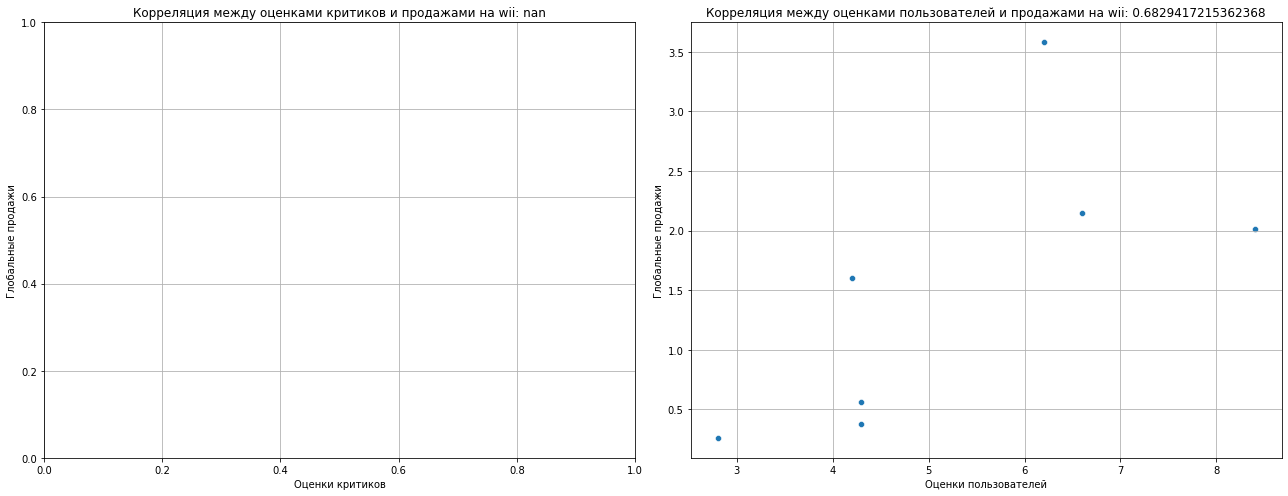

In [54]:
plt.figure(figsize=(18, 7))

correlation_critic_wii = critic_filtered_platform_wii['critic_score'].corr(critic_filtered_platform_wii['total_sales'])
correlation_user_wii = user_filtered_platform_wii['user_score'].corr(user_filtered_platform_wii['total_sales'])

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_wii.query('critic_score != -1'), palette='Set1')
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи')
plt.title(f"Корреляция между оценками критиков и продажами на wii: {correlation_critic_wii}")
plt.grid()

plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_wii.query('user_score != -1'), palette='Set2')
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи')
plt.title(f"Корреляция между оценками пользователей и продажами на wii: {correlation_user_wii}")
plt.grid()

plt.tight_layout()
plt.show()

На платформе wii нет оценки критиков, и средняя корреляция оценки пользователей

x360

In [55]:
platform_x360 = platform_4_years[platform_4_years['platform'] == "x360"]

critic_filtered_platform_x360 = platform_x360.query('critic_score != -1 and total_sales != 0')
print(len(critic_filtered_platform_x360.count()))

user_filtered_platform_x360 = platform_x360.query('user_score != -1 and total_sales != 0')
print(len(user_filtered_platform_x360.count()))

12
12


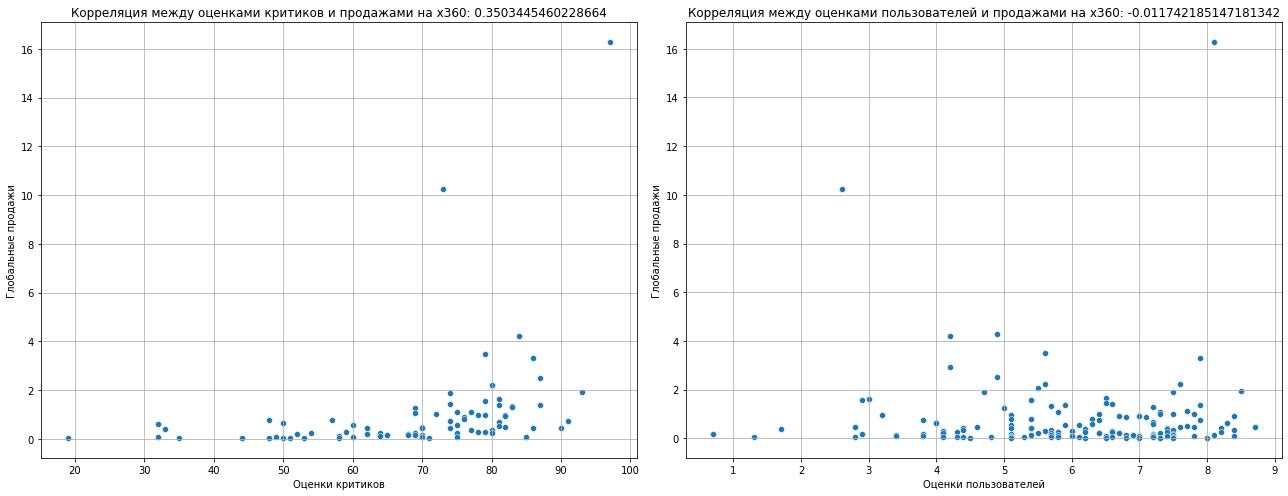

In [56]:
plt.figure(figsize=(18, 7))

correlation_critic_x360 = critic_filtered_platform_x360['critic_score'].corr(critic_filtered_platform_x360['total_sales'])
correlation_user_x360 = user_filtered_platform_x360['user_score'].corr(user_filtered_platform_x360['total_sales'])

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_x360.query('critic_score != -1'), palette='Set1')
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи')
plt.title(f"Корреляция между оценками критиков и продажами на x360: {correlation_critic_x360}")
plt.grid()

plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_x360.query('user_score != -1'), palette='Set2')
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи')
plt.title(f"Корреляция между оценками пользователей и продажами на x360: {correlation_user_x360}")
plt.grid()

plt.tight_layout()
plt.show()

На платформе х360 наблюдается слабая корреляция оценки критиков и очень слабая корреляция оценки пользователей

Влияние оценок отличается на разных платформах. 
На Американских платформах x360 и xone корреляция оценки пользователей минимальна, но средняя корреляция оценки критиков. На Японской платформе PS4 средняя корреляция критиков и минимальна корреляция оценки пользователей, на WiiU средние обе корреляции, на Wii высокая корреляция пользователей и минимальная корреляция критиков. 

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [58]:
platform_4_years.groupby('genre')['total_sales'].sum().sort_values()

genre
puzzle            3.17
strategy         10.08
simulation       21.76
adventure        23.64
fighting         35.31
racing           39.89
platform         42.63
misc             62.82
role-playing    145.89
sports          150.65
shooter         232.98
action          321.87
Name: total_sales, dtype: float64

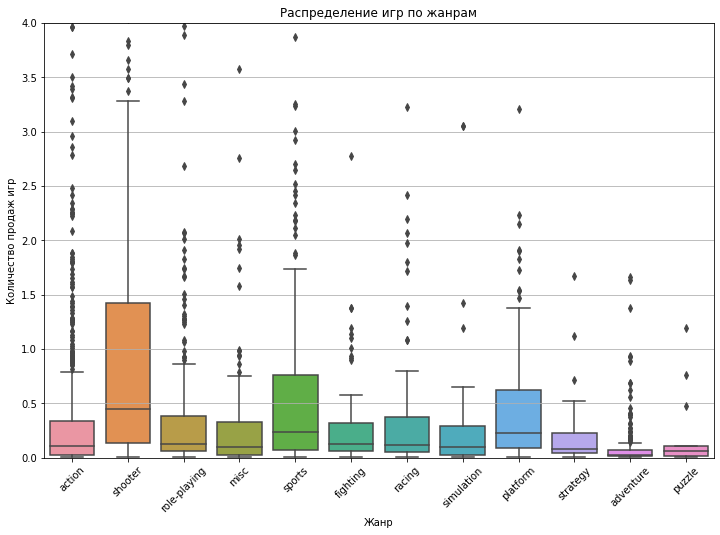

In [59]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='total_sales', data=platform_4_years)
plt.ylim(0, 4) #приблизить график
plt.xlabel('Жанр')
plt.ylabel('Количество продаж игр')
plt.title('Распределение игр по жанрам')
plt.xticks(rotation=45)  # повернуть подписи оси X для удобства
plt.grid(axis='y')  # отображать сетку только по оси Y
plt.show()

За 4 года самые популярные игры в жанре экшен, шутер, спорт и рпг. По диаграмме видно, что шутеры продаются большими тиражами. Среди экшен и ролевых игр много игр с маленьким количеством проданных копий. Спортивные игры занимают средние позиции по количеству продающихся игр. 

### Шаг 4. Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**

**Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [60]:
platform_4_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62


In [61]:
platform_4_years.groupby('platform')['na_sales'].sum().sort_values()

platform
psp       0.00
ds        0.57
psv       5.04
wii       6.56
pc       11.11
wiiu     29.21
3ds      38.20
ps3      63.50
x360     81.66
xone     93.12
ps4     108.74
Name: na_sales, dtype: float64

In [62]:
platform_4_years.groupby('genre')['na_sales'].sum().sort_values()

genre
puzzle            0.83
strategy          3.28
simulation        4.86
adventure         7.14
racing           12.96
fighting         15.55
platform         18.14
misc             27.49
role-playing     46.40
sports           65.27
shooter         109.74
action          126.05
Name: na_sales, dtype: float64

In [63]:
platform_4_years.groupby('rating')['na_sales'].sum().sort_values()

rating
t           49.79
e10+        54.24
e           79.05
unknown     89.42
m          165.21
Name: na_sales, dtype: float64

В Северной Америке:

Самые популярные платформы: ps4, xone, x360, ps3, 3ds

Самые популярные жанры: экшен и шутер. Далее с большим отрывом спорт и рпг

Основной возраст играющих: 18+

In [64]:
platform_4_years.groupby('platform')['eu_sales'].sum().sort_values()

platform
psp       0.17
ds        0.85
wii       5.93
psv       6.10
wiiu     19.85
pc       25.36
3ds      30.96
x360     42.52
xone     51.59
ps3      67.81
ps4     141.09
Name: eu_sales, dtype: float64

In [65]:
platform_4_years.groupby('genre')['eu_sales'].sum().sort_values()

genre
puzzle            1.00
strategy          4.22
adventure         8.25
fighting          8.55
simulation       10.92
platform         15.58
misc             20.04
racing           20.19
role-playing     36.97
sports           60.52
shooter          87.86
action          118.13
Name: eu_sales, dtype: float64

In [66]:
platform_4_years.groupby('rating')['eu_sales'].sum().sort_values()

rating
t           41.95
e10+        42.69
unknown     78.91
e           83.36
m          145.32
Name: eu_sales, dtype: float64

В Европе:

Самые популярные платформы: ps4, ps3, xone, x360, 3ds

Самые популярные жанры: экшен, шутер. Далее с отрывом спорт и рпг

Основной возраст играющих: 18+

In [67]:
platform_4_years.groupby('platform')['jp_sales'].sum().sort_values()

platform
ds       0.00
pc       0.00
wii      0.05
xone     0.34
x360     0.51
psp      3.29
wiiu    10.88
ps4     15.96
psv     18.59
ps3     23.35
3ds     67.81
Name: jp_sales, dtype: float64

In [68]:
platform_4_years.groupby('genre')['jp_sales'].sum().sort_values()

genre
puzzle           1.18
strategy         1.77
racing           2.30
simulation       4.52
platform         4.79
sports           5.41
adventure        5.82
shooter          6.61
fighting         7.65
misc             9.20
action          40.49
role-playing    51.04
Name: jp_sales, dtype: float64

In [69]:
platform_4_years.groupby('rating')['jp_sales'].sum().sort_values()

rating
e10+        5.89
m          14.11
e          15.14
t          20.59
unknown    85.05
Name: jp_sales, dtype: float64

В Японии:

Самые популярные платформы: 3ds, ps3, psv, ps4, wiiu

Самые популярные жанры - рпг, экшен. Остальные минимальны. 

Основной возраст играющих неизвестен.

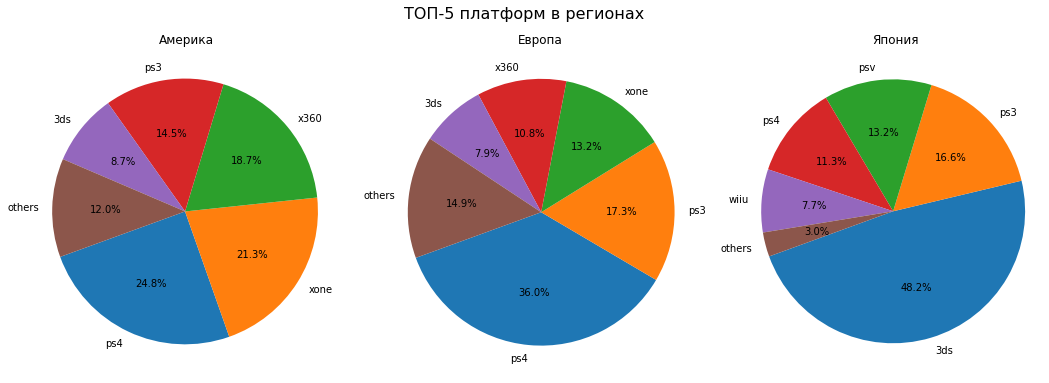

In [70]:
plt.figure(figsize=(18, 6))
plt.suptitle('ТОП-5 платформ в регионах', fontsize=16)

# Америка по жанрам
na_sales_by_platform = platform_4_years.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
top5_na = na_sales_by_platform[:5]
other_na = na_sales_by_platform[5:].sum()
other_series_na = pd.Series([other_na], index=['others'])
na_sales_combined = pd.concat([top5_na, other_series_na])

plt.subplot(1, 3, 1)
plt.pie(na_sales_combined, labels=na_sales_combined.index, autopct='%1.1f%%', startangle=200)
plt.title('Америка')
plt.axis('equal')

# Европа по жанрам
eu_sales_by_platform = platform_4_years.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
top5_eu = eu_sales_by_platform[:5]
other_eu = eu_sales_by_platform[5:].sum()
other_series_eu = pd.Series([other_eu], index=['others'])
eu_sales_combined = pd.concat([top5_eu, other_series_eu])

plt.subplot(1, 3, 2)
plt.pie(eu_sales_combined, labels=eu_sales_combined.index, autopct='%1.1f%%', startangle=200)
plt.title('Европа')
plt.axis('equal')

# Япония по жанрам
jp_sales_by_platform = platform_4_years.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
top5_jp = jp_sales_by_platform[:5]
other_jp = jp_sales_by_platform[5:].sum()
other_series_jp = pd.Series([other_jp], index=['others'])
jp_sales_combined = pd.concat([top5_jp, other_series_jp])

plt.subplot(1, 3, 3)
plt.pie(jp_sales_combined, labels=jp_sales_combined.index, autopct='%1.1f%%', startangle=200)
plt.title('Япония')
plt.axis('equal')

plt.show()

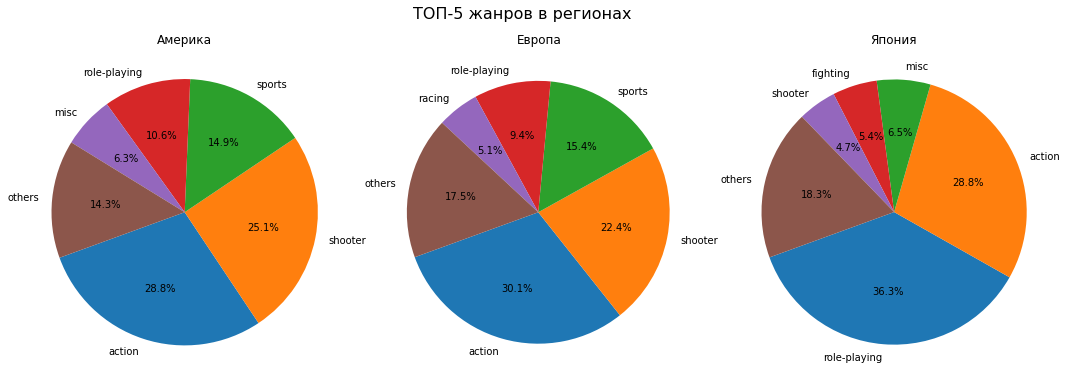

In [71]:
plt.figure(figsize=(18, 6))
plt.suptitle('ТОП-5 жанров в регионах', fontsize=16)

# Америка по жанрам
na_sales_by_genre = platform_4_years.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
top5_na_genre = na_sales_by_genre[:5]
other_na_genre = na_sales_by_genre[5:].sum()
other_series_na_genre = pd.Series([other_na_genre], index=['others'])
na_sales_combined_genre = pd.concat([top5_na_genre, other_series_na_genre])

plt.subplot(1, 3, 1)
plt.pie(na_sales_combined_genre, labels=na_sales_combined_genre.index, autopct='%1.1f%%', startangle=200)
plt.title('Америка')
plt.axis('equal')

# Европа по жанрам
eu_sales_by_genre = platform_4_years.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
top5_eu_genre = eu_sales_by_genre[:5]
other_eu_genre = eu_sales_by_genre[5:].sum()
other_series_eu_genre = pd.Series([other_eu_genre], index=['others'])
eu_sales_combined_genre = pd.concat([top5_eu_genre, other_series_eu_genre])

plt.subplot(1, 3, 2)
plt.pie(eu_sales_combined_genre, labels=eu_sales_combined_genre.index, autopct='%1.1f%%', startangle=200)
plt.title('Европа')
plt.axis('equal')

# Япония по жанрам
jp_sales_by_genre = platform_4_years.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
top5_jp_genre = jp_sales_by_genre[:5]
other_jp_genre = jp_sales_by_genre[5:].sum()
other_series_jp_genre = pd.Series([other_jp_genre], index=['others'])
jp_sales_combined_genre = pd.concat([top5_jp_genre, other_series_jp_genre])

plt.subplot(1, 3, 3)
plt.pie(jp_sales_combined_genre, labels=jp_sales_combined_genre.index, autopct='%1.1f%%', startangle=200)
plt.title('Япония')
plt.axis('equal')

plt.show()

В целом рынок Европы и Северной Америки не отличается. Япония отличается сильно по выбору консолей а также жанровым предпочтениям

In [72]:
na = platform_4_years['na_sales'].sum()
eu = platform_4_years['eu_sales'].sum()
jp = platform_4_years['jp_sales'].sum()
other = platform_4_years['other_sales'].sum()
full = platform_4_years['total_sales'].sum()

print(f'Процент продаж в Северной Америке составляет {na / full}')
print(f'Процент продаж в Европе составляет {eu / full}')
print(f'Процент продаж в Японии составляет {jp / full}')
print(f'Процент продаж в других регионах составляет {other / full}')

Процент продаж в Северной Америке составляет 0.40131476404844635
Процент продаж в Европе составляет 0.3596163896249163
Процент продаж в Японии составляет 0.12907425574636242
Процент продаж в других регионах составляет 0.10999459058027486


Больше всего игр продаются в Америке, далее в Европе. В Японии и других регионов доля продажа низкая.

### Шаг 5. Проверьте гипотезы

In [73]:
platform_4_years['platform'].unique()

array(['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

Проведу тест на проверку нормального распределения

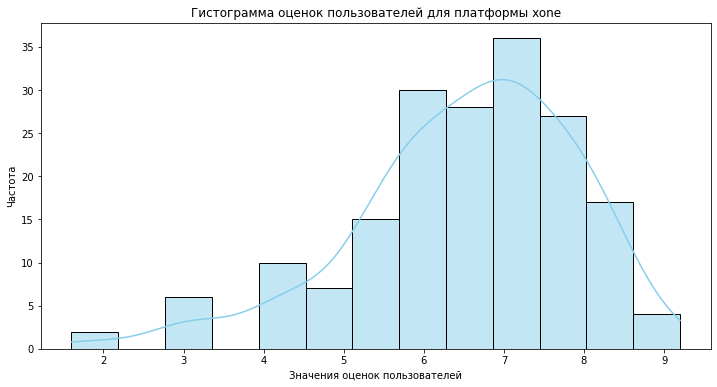

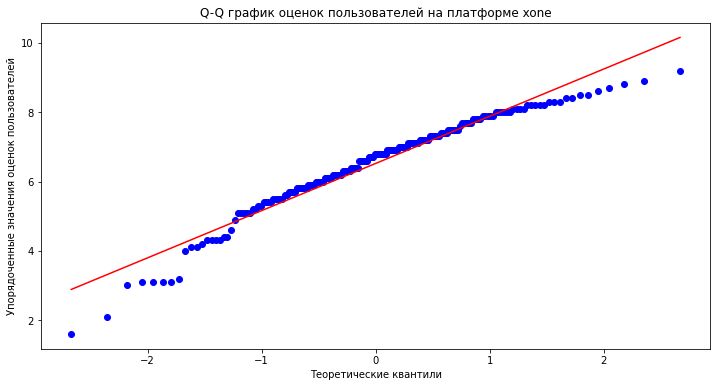

(182,)

In [74]:
xone = platform_4_years[(platform_4_years['platform'] == "xone") & (platform_4_years['user_score'] != -1)]['user_score']

# Гистограмма
plt.figure(figsize=(12, 6))
sns.histplot(xone, kde=True, color='skyblue')
plt.title('Гистограмма оценок пользователей для платформы xone')
plt.xlabel('Значения оценок пользователей')
plt.ylabel('Частота')
plt.show()

# Q-Q график
plt.figure(figsize=(12, 6))
stats.probplot(xone, dist="norm", plot=plt)
plt.title('Q-Q график оценок пользователей на платформе xone')
plt.xlabel('Теоретические квантили')
plt.ylabel('Упорядоченные значения оценок пользователей')
plt.show()

xone.shape

Распределение нормальное смещено вправо для 182 значений

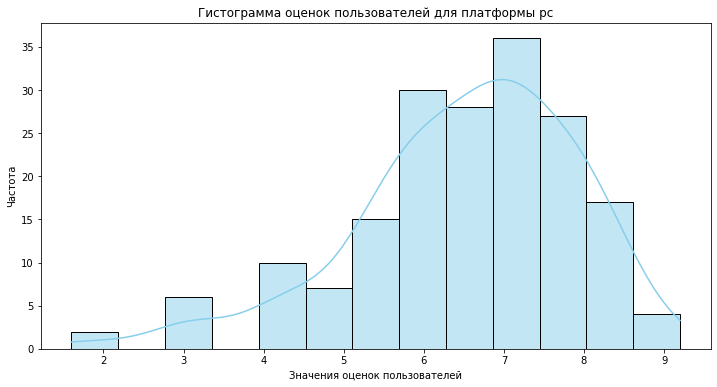

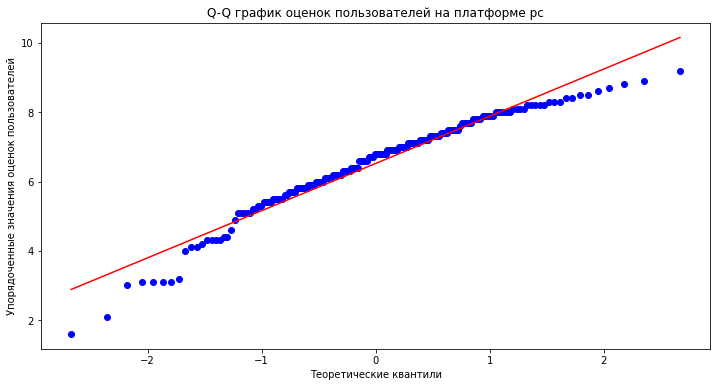

(155,)

In [75]:
pc = platform_4_years[(platform_4_years['platform'] == "pc") & (platform_4_years['user_score'] != -1)]['user_score']

# Гистограмма
plt.figure(figsize=(12, 6))
sns.histplot(xone, kde=True, color='skyblue')
plt.title('Гистограмма оценок пользователей для платформы pc')
plt.xlabel('Значения оценок пользователей')
plt.ylabel('Частота')
plt.show()

# Q-Q график
plt.figure(figsize=(12, 6))
stats.probplot(xone, dist="norm", plot=plt)
plt.title('Q-Q график оценок пользователей на платформе pc')
plt.xlabel('Теоретические квантили')
plt.ylabel('Упорядоченные значения оценок пользователей')
plt.show()

pc.shape

Распределение нормальное смещено вправо для 155 значений

Для определения уровня альфа, воспользуюсь таблицей z-оценки для разных доверительных уровней 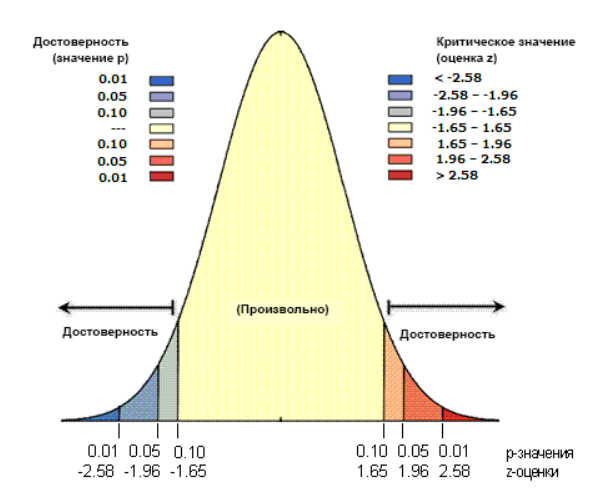

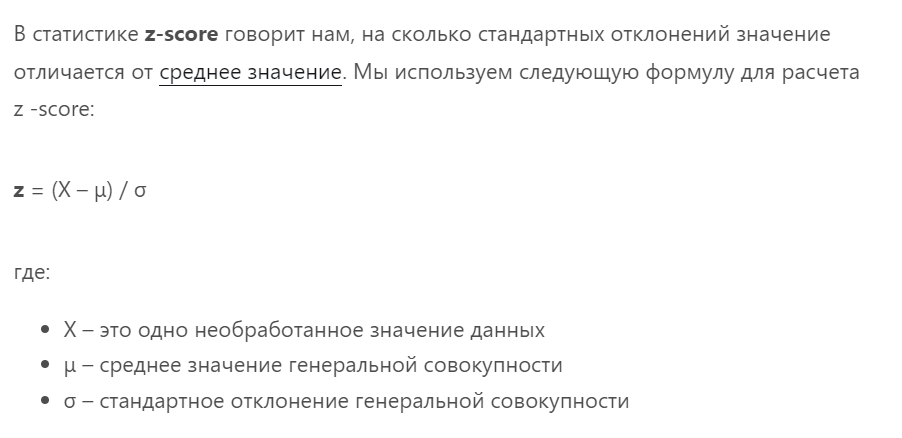

In [76]:
xone_zscore = zscore(xone)
xone_overall_z_score = np.median(xone_zscore)

pc_zscore = zscore(pc)
pc_overall_z_score = np.median(pc_zscore)

print(xone_overall_z_score)
print(pc_overall_z_score)

0.20228235023304045
0.3053531435641196


In [77]:
alpha = 0.01 

# Двухвыборочный t-тест для независимых выборок
results = stats.ttest_ind(
    xone,
    pc,
    alternative='two-sided',
    equal_var = False)

print('p-значение:', results.pvalue)

# Вывод гипотезы
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной: средние пользовательские рейтинги платформ Xbox One и PC статистически отличаются")
else:
    print("Нет оснований отвергать нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые") 

print(f'Средний рейтинг платформы xone: {xone.mean()}')
print(f'Средний рейтинг платформы pc: {pc.mean()}')

p-значение: 0.14759594013430463
Нет оснований отвергать нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Средний рейтинг платформы xone: 6.521428571428572
Средний рейтинг платформы pc: 6.2696774193548395


H0 = средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 = средние пользовательские рейтинги платформ Xbox One и PC статистически отличаются

Выбираю двухвыборочный t-тест для независимых выборок, потому что выборки независимые и нам важно понять есть ли отличие в целом, то есть мы смотрим отклонение в обе стороны. Нулевая гипотеза формулируетя равенством средних, альтернативная предполагает, что средние значимо отличаются.

**Результат: средние пользовательские рейтинги платформ Xbox One и PC статистически не отличаются**

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

In [78]:
platform_4_years['genre'].unique()

array(['action', 'shooter', 'role-playing', 'misc', 'sports', 'fighting',
       'racing', 'simulation', 'platform', 'strategy', 'adventure',
       'puzzle'], dtype=object)

Проверяю на нормальность жанры

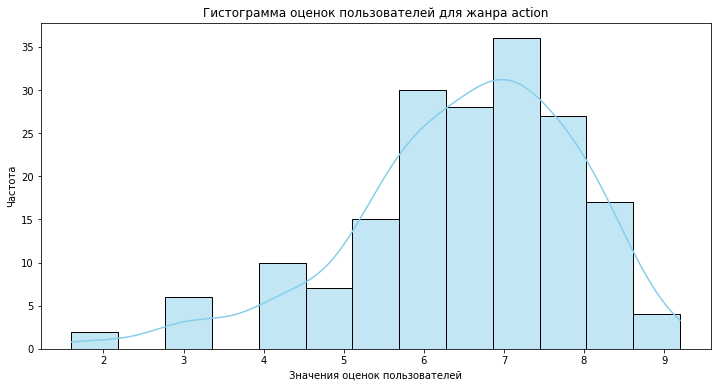

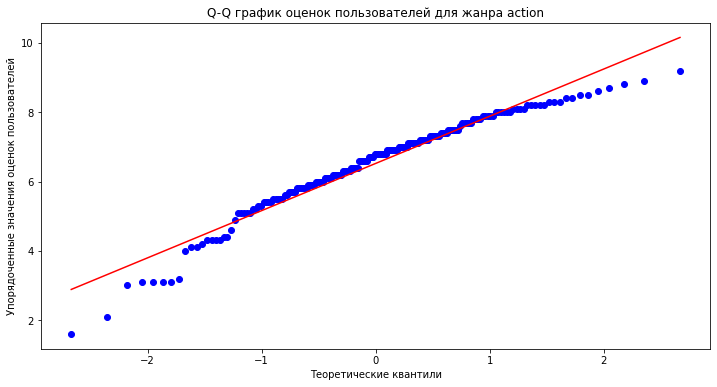

(389,)

In [79]:
action = platform_4_years[(platform_4_years['genre'] == "action") & (platform_4_years['user_score'] != -1)]['user_score']

# Гистограмма
plt.figure(figsize=(12, 6))
sns.histplot(xone, kde=True, color='skyblue')
plt.title('Гистограмма оценок пользователей для жанра action')
plt.xlabel('Значения оценок пользователей')
plt.ylabel('Частота')
plt.show()

# Q-Q график
plt.figure(figsize=(12, 6))
stats.probplot(xone, dist="norm", plot=plt)
plt.title('Q-Q график оценок пользователей для жанра action')
plt.xlabel('Теоретические квантили')
plt.ylabel('Упорядоченные значения оценок пользователей')
plt.show()

action.shape

Распределение нормальное смещено вправо для 389 значений

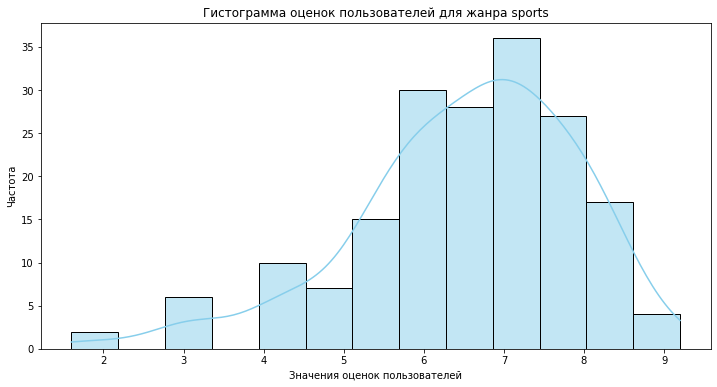

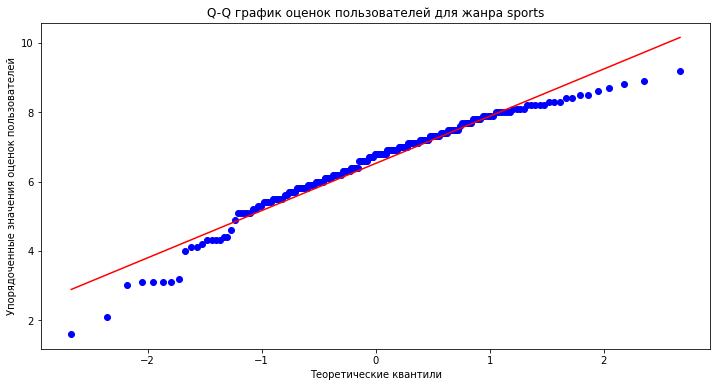

(160,)

In [80]:
sports = platform_4_years[(platform_4_years['genre'] == "sports") & (platform_4_years['user_score'] != -1)]['user_score']

# Гистограмма
plt.figure(figsize=(12, 6))
sns.histplot(xone, kde=True, color='skyblue')
plt.title('Гистограмма оценок пользователей для жанра sports')
plt.xlabel('Значения оценок пользователей')
plt.ylabel('Частота')
plt.show()

# Q-Q график
plt.figure(figsize=(12, 6))
stats.probplot(xone, dist="norm", plot=plt)
plt.title('Q-Q график оценок пользователей для жанра sports')
plt.xlabel('Теоретические квантили')
plt.ylabel('Упорядоченные значения оценок пользователей')
plt.show()

sports.shape

Распределение нормальное смещено вправо для 158 значений

In [81]:
sports_zscore = zscore(sports)
sports_overall_z_score = np.median(sports_zscore)

action_zscore = zscore(action)
action_overall_z_score = np.median(action_zscore)

print(sports_overall_z_score)
print(action_overall_z_score)

0.14729909118034498
0.19757266828734962


In [82]:
alpha = 0.1 

# Двухвыборочный t-тест для независимых выборок
results = stats.ttest_ind(
    action,
    sports,
    alternative='two-sided',
    equal_var = False)

print('p-значение:', results.pvalue)

# Вывод гипотезы
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной: средние пользовательские рейтинги жанров Action и Sports статистически отличаются")
else:
    print("Нет оснований отвергать нулевую гипотезу: средние пользовательские рейтинги пжанров Action и Sports одинаковые") 

print(f'Средний рейтинг жанра Action: {action.mean()}')
print(f'Средний рейтинг жанра Sports: {sports.mean()}')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу в пользу альтернативной: средние пользовательские рейтинги жанров Action и Sports статистически отличаются
Средний рейтинг жанра Action: 6.837532133676092
Средний рейтинг жанра Sports: 5.238124999999999


H0 = средние пользовательские рейтинги жанров Action и Sports одинаковые

H1 = средние пользовательские рейтинги жанров Action и Sports статистически отличаются

Выбираю двухвыборочный t-тест для независимых выборок, потому что выборки независимые и нам важно понять есть ли отличие в целом, то есть мы смотрим отклонение в обе стороны. Нулевая гипотеза формулируетя равенством средних, альтернативная предполагает, что средние значимо отличаются.

**Результат: средние пользовательские рейтинги жанров Action и Sports статистически отличаются**

#### Шаг 6. Напишите общий вывод

**Выводы:**
    
    
**Описание данных:**
Представлены данные по продажа игр в регионах с 1980 по 2016 годы. 
    
**Обработка данных:**
В ходе работы, были переименованы столбцы, проверены дубликаты, удалено около 2% значений.
    
**Исследование данных:**
За всю историю, в среднем игр игровая платформа живет 7 лет. Платформы ds, ps, ps2 уже не актуальны.
    
За последние 4 года по продажам лидируют платформы ps4 и xone. Наиболее перспективне платформы: ps4, x360, wiiu, xone, wii. 
Слабую зависимость от оценок критиков показали платформы: ps4, wiiu, xone, x360. Слабую зависимость от оценок пользователей показала платформа: wiiu, среднюю платформа: wii.
Самые продающиеся жанры: экшен, шутер и рпг.
    
**Портрет пользователей по регионам:**  
Северная Америка: основной возраст играющих 18+, популярные платформы: ps4, xone, x360, ps3, 3ds, популярные жанры: экшен и шутер. Регион занимает 40% рынка по покупке игр.

Европа: основной возраст играющих 18+, популярные платформы: ps4, xone, x360, ps3, 3ds, популярные жанры: экшен и шутер. Регион занимает 35% рынка по покупке игр.
    
Япония: основной возраст играющих неизвестен, популярные платформы: 3ds, ps3, psv, ps4, wiiu, популярные жанры - рпг, экшен. Регион занимает 12% рынка по покупке игр.
     
**Проверка гипотез:**  
Средние пользовательские рейтинги платформ Xbox One и PC статистически не отличаются, средние пользовательские рейтинги жанров Action и Sports статистически отличаются.

**Общий вывод:**
Рекламный бюджет в 2017 году лучше потратить на экшен и шутер новинки платформ ps4, xone, x360 для Европы и Америки с маркировкой 18+; и экшен, рпг новинки на платформе ps4, wiiu для Японии.
